Data Describtion :-

- Date : Date of trading

- Open : Price at which security first trades

- High : Highest Price of the trading day

- Low : Lowest Price of the trading day

- Close : Last Price the stock traded during the trading day

- Adj Close : Price that is adjusts Coroporate Actions on Closing Price

- Volume : Number of Shares that changed hands during the trading day

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [5]:
print('No. of Observations: {}\nNo. of Parameters: {}'.format(data.shape[0],data.shape[1]))

No. of Observations: 2011
No. of Parameters: 7


-> As we can see, there are 2011 trading days even though the number of days in this period of time is much larger than 2011. This is because the stock market is not open on weekend and some USA's speacial days such as Independence day, Christmas Day, New Year's Eve and so forth.

In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.duplicated().sum()

0

- There are no missing values and duplicates values.

In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


The data type of our Date column should be converted into an appropriate format so that we can work with that variable when visualizing the data.

In [8]:
#Converting to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
#Setting Date as Index 
data.set_index('Date',inplace=True)

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


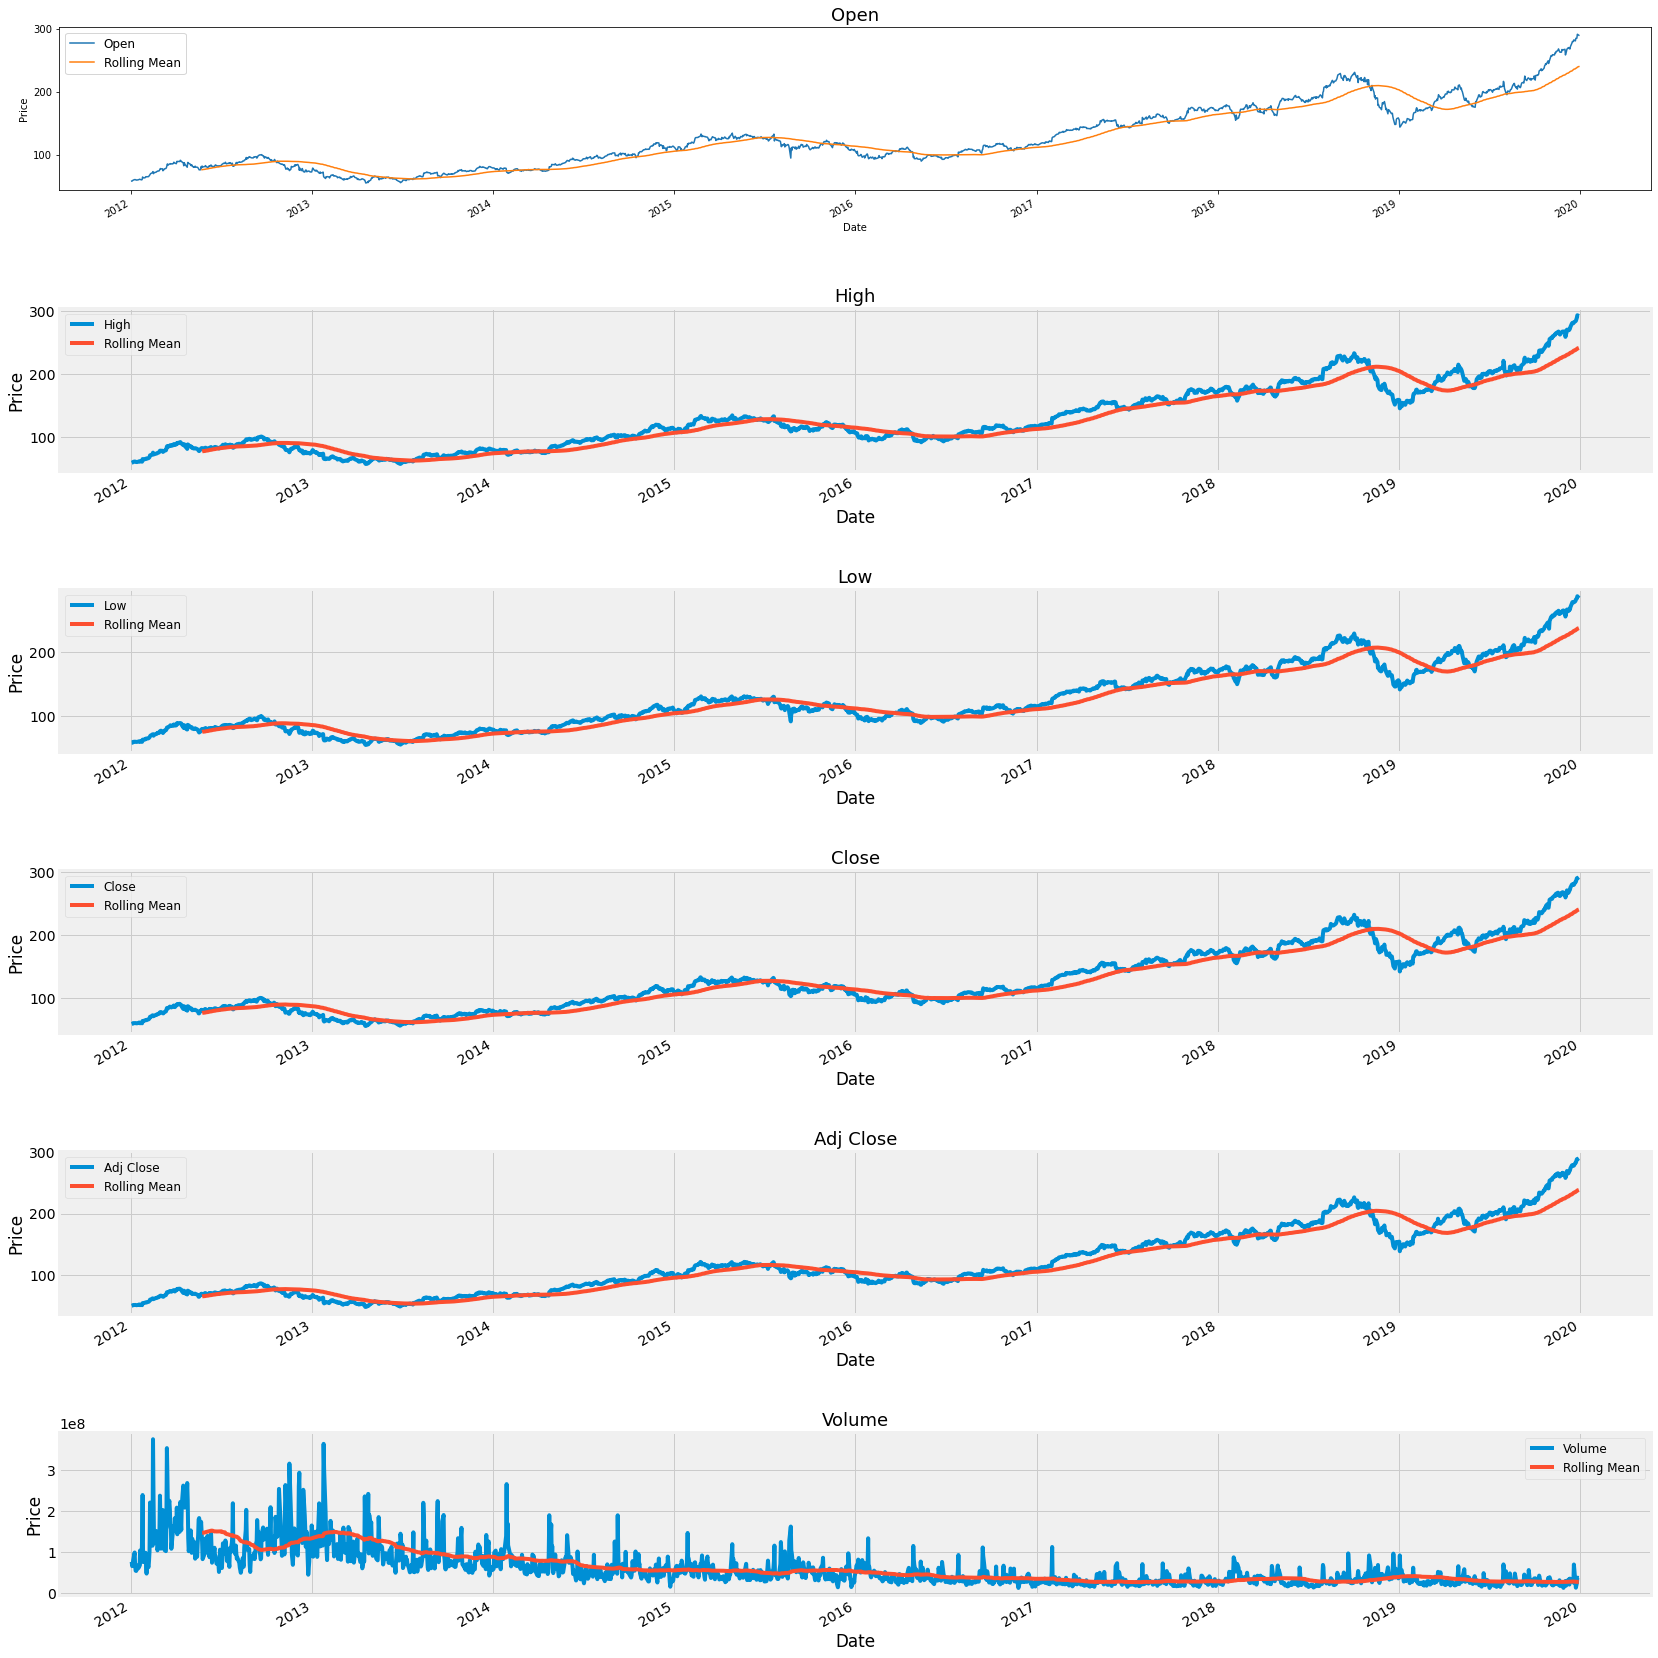

In [16]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    ax.plot(data.iloc[:,i],label=col_names[i])
    data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
    ax.set_title(col_names[i],fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.patch.set_edgecolor('black')  
    plt.style.context('fivethirtyeight')
    plt.legend(prop={'size': 12})
    plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

- The rolling average has a smoother curve than the stock_price curve.

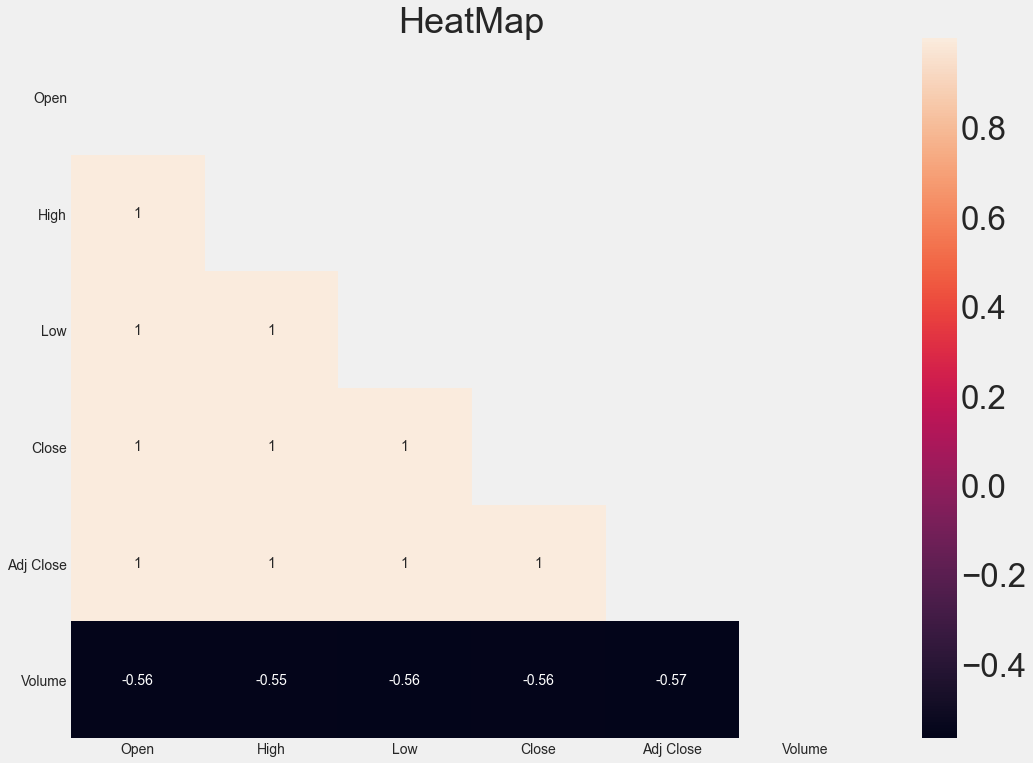

In [23]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix)
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

- We can eliminate features like Open,Low, High, Adj Close automatically as they are high multicollinear with Close. We consider Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

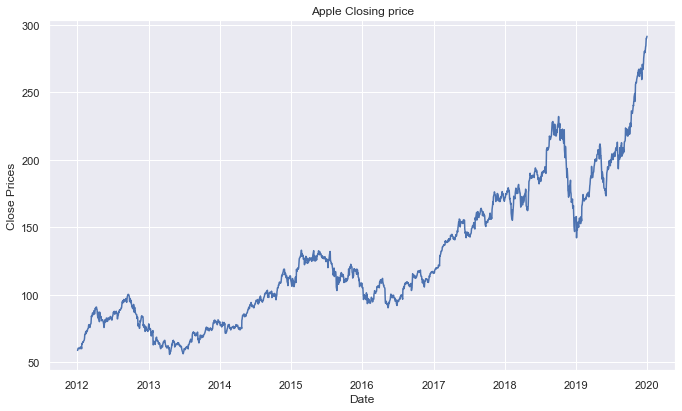

In [51]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Apple Closing price')
plt.show()

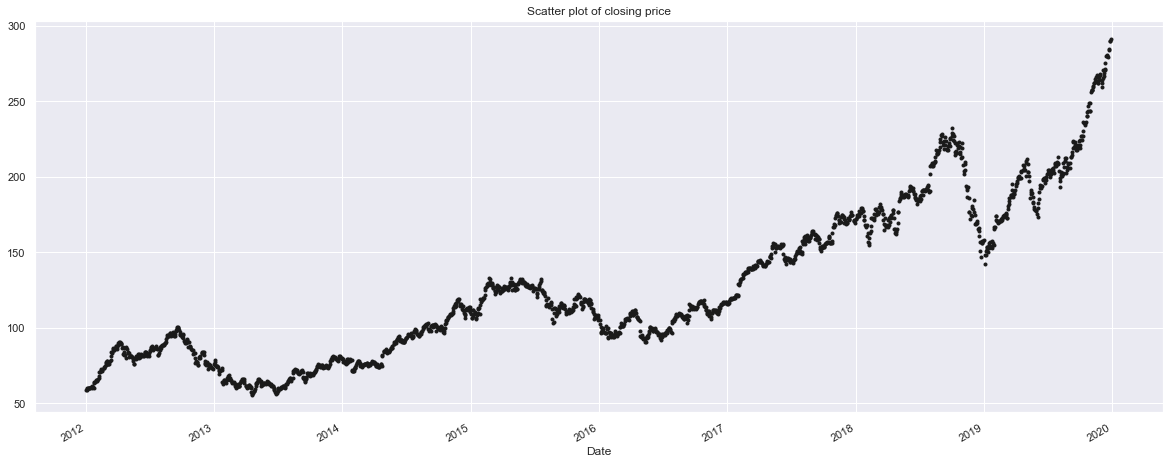

In [52]:
 #scatterplot:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [24]:
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2012-01-31,61.225428
2012-02-29,71.081572
2012-03-31,82.501104
2012-04-30,86.571857
2012-05-31,80.667597
...,...
2019-08-31,204.957728
2019-09-30,217.994999
2019-10-31,235.286521


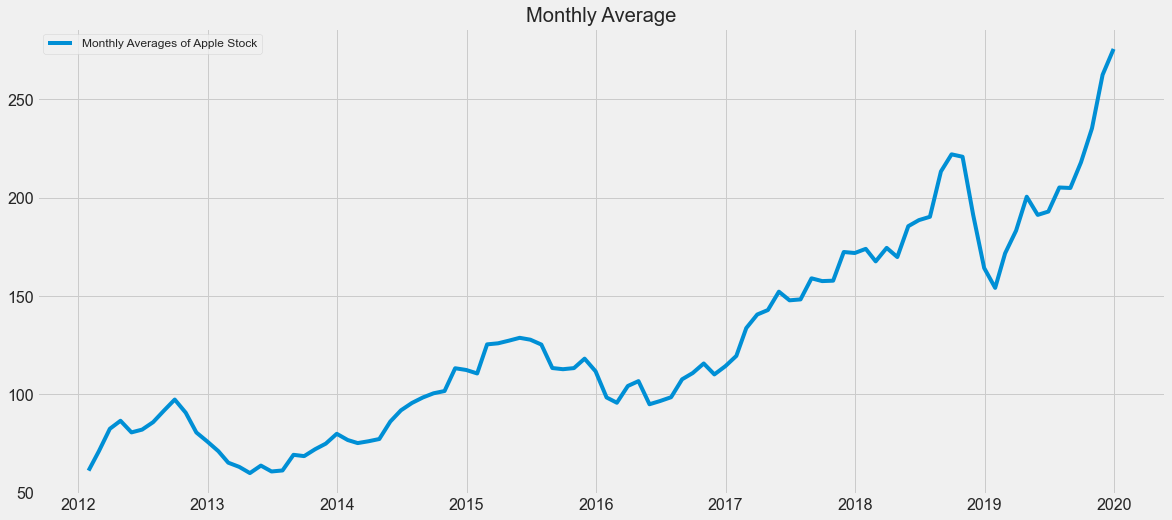

In [26]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages of Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.title('Monthly Average')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [27]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,61.225428,2012,January,Tuesday,1
2012-02-29,71.081572,2012,February,Wednesday,1
2012-03-31,82.501104,2012,March,Saturday,1
2012-04-30,86.571857,2012,April,Monday,2
2012-05-31,80.667597,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,204.957728,2019,August,Saturday,3
2019-09-30,217.994999,2019,September,Monday,3
2019-10-31,235.286521,2019,October,Thursday,4


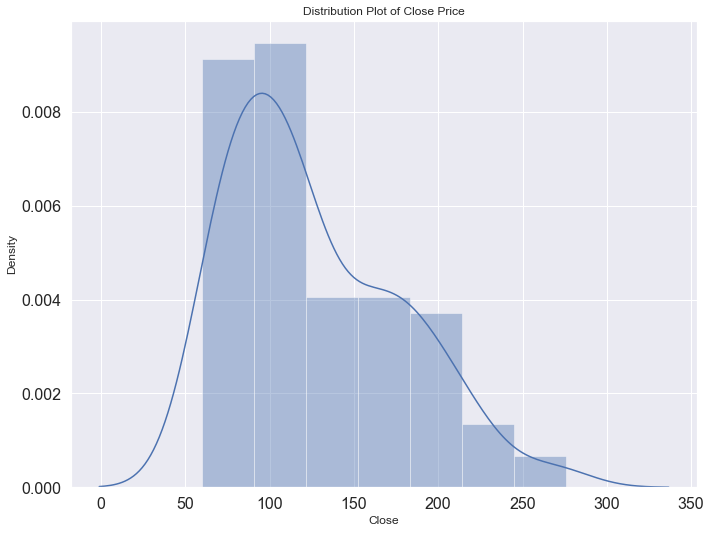

In [31]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot of Close Price")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

- Data is Right Skewed

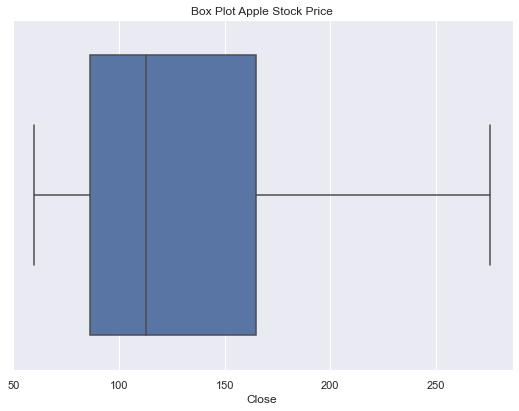

In [32]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

- No outliers

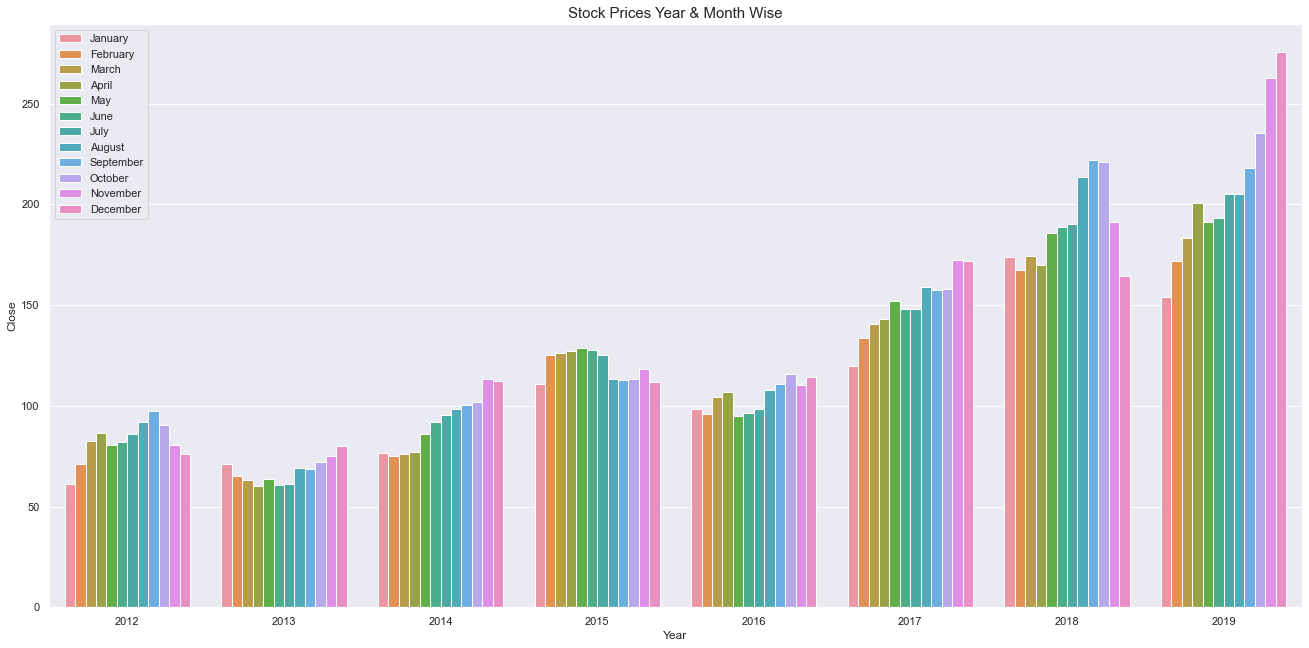

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

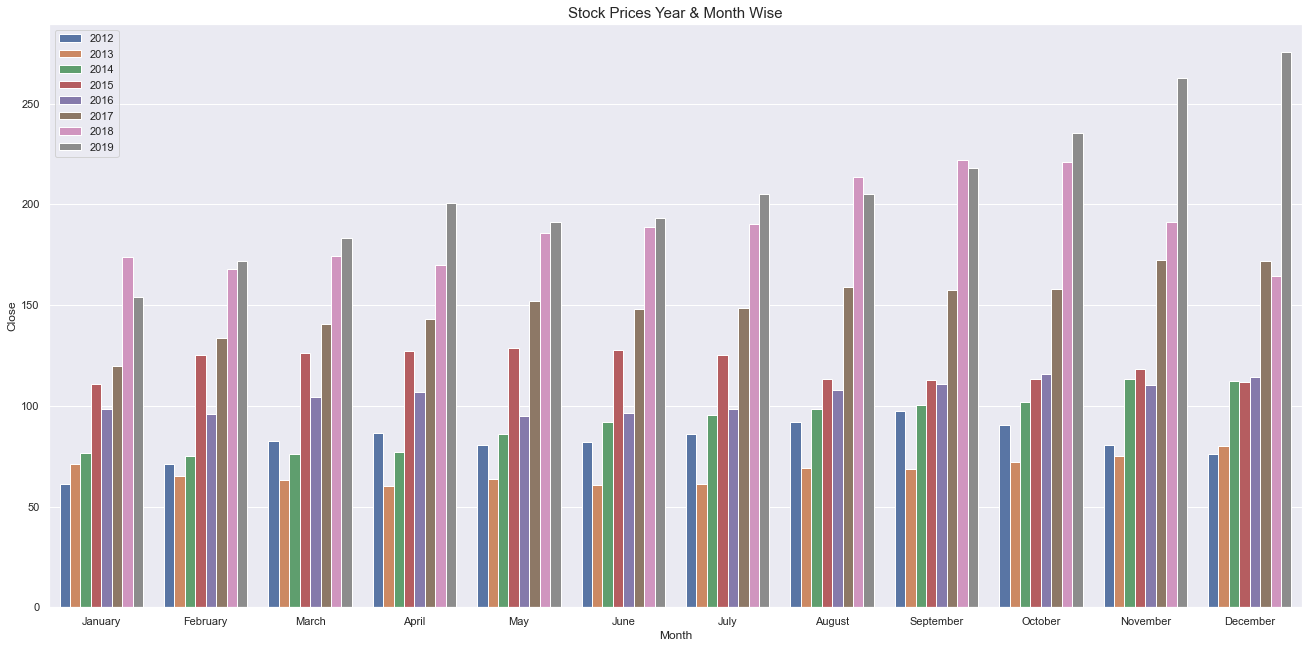

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Month", y="Close",hue = 'Year',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

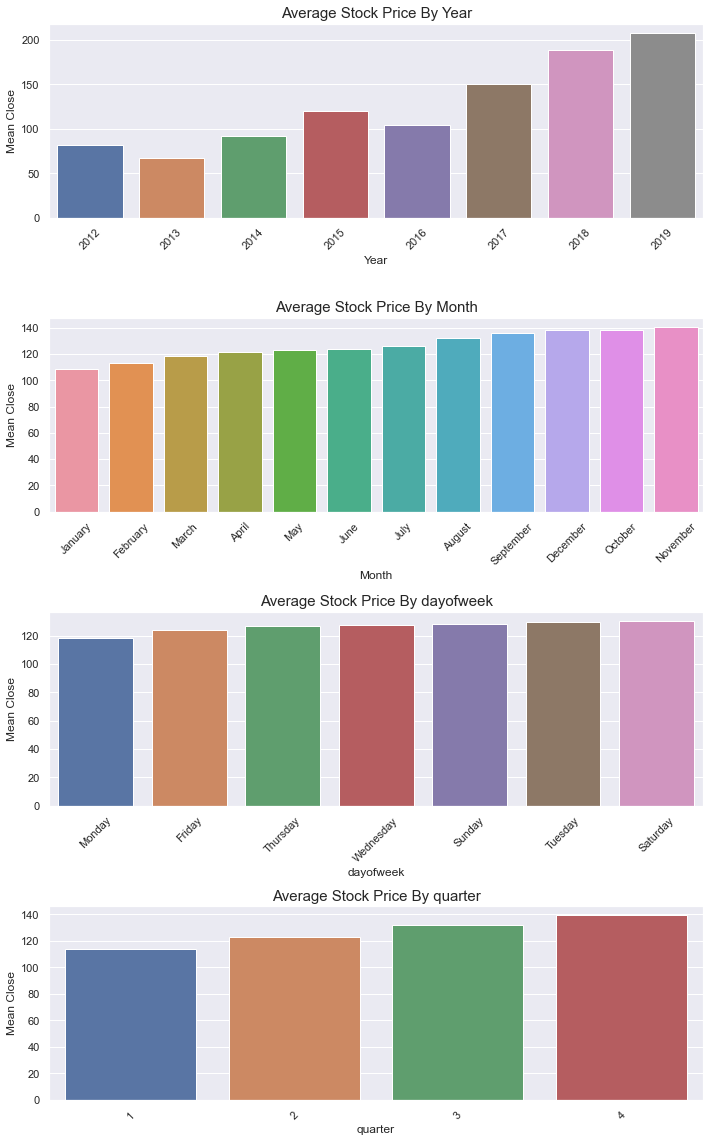

In [34]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

- According to Mean price by Years, there is a constant increase in stock price from 2017.


- Average Stock Price is lower at start of the week in comparision to the end of the week.


- The Average Price increases in the las6 months of the year.


- Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

### Decomposition of Time Series
- A statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.

<Figure size 1440x1440 with 0 Axes>

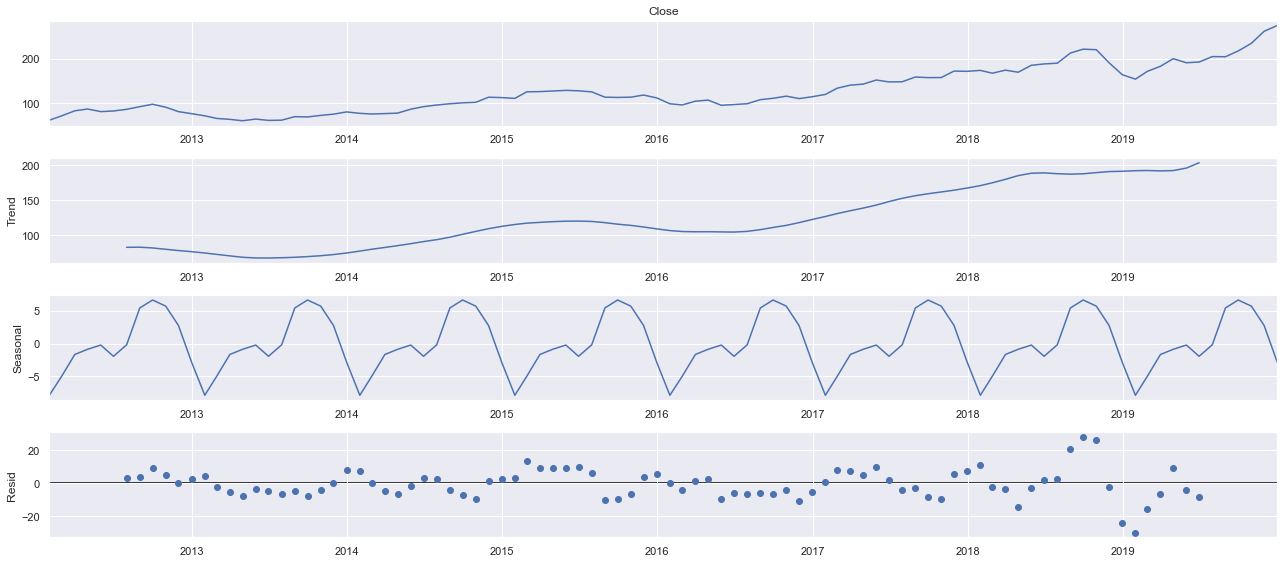

In [42]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,20))
decomposed_series = sd(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

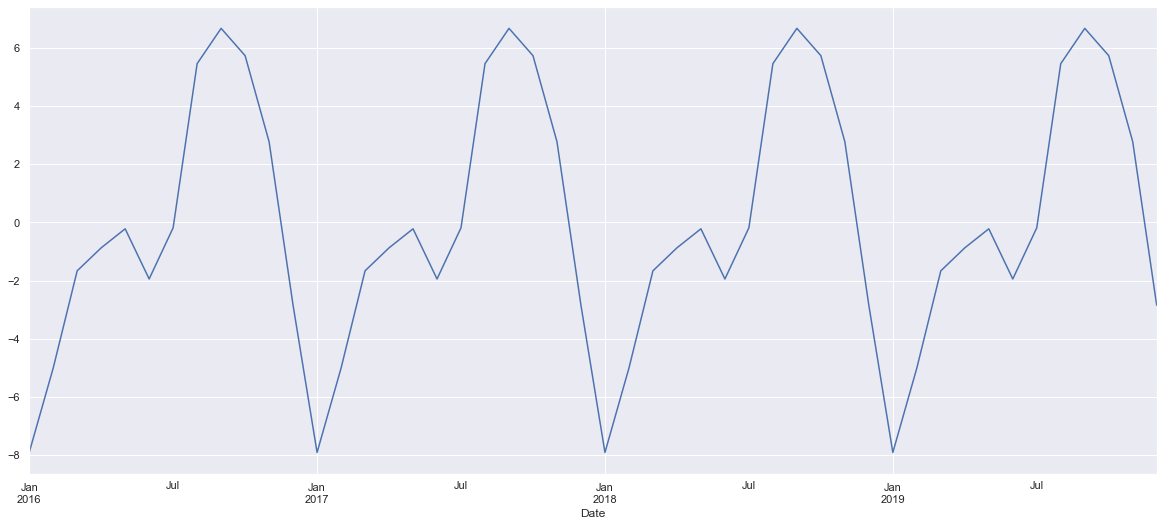

<Figure size 576x576 with 0 Axes>

In [45]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2016':'2019'].plot()
fig = plt.figure(figsize=(8,8))

### Checking for stationarity

In [61]:
def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [63]:
adfuller_test(monthly_data['Close'])

ADF Test Statistic : 0.5121100349491027
p-value : 0.9852365602721008
#Lags Used : 1
Number of Observations Used : 94
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### AutoCorrelation Function(ACF)

Text(0.5, 0, 'Lags')

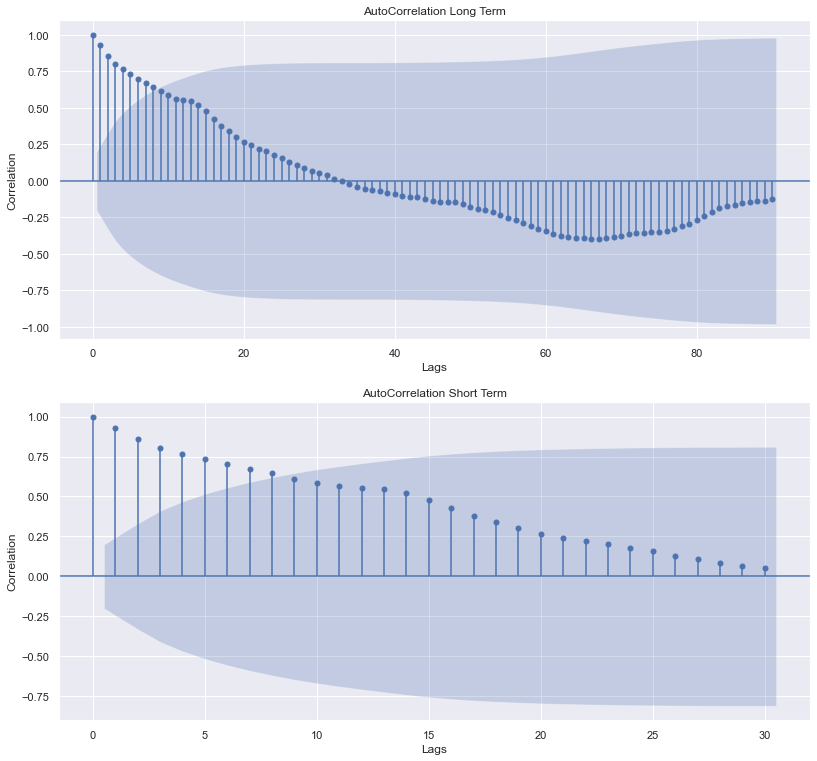

In [66]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')